# Empirical project 2 (Taller 4)- Working in Python

## Getting started in Python


Read the 'Getting Started in Python' page for help and advice on setting up a Python session to work with. Remember, you can run any page from this book as a *notebook* by downloading the relevant file from this [repository](https://github.com/aeturrell/core_python) and running it on your own computer. Alternatively, you can run pages online in your browser over at [Binder](https://mybinder.org/v2/gh/aeturrell/core_python/HEAD).


### Preliminary settings


Let's import the packages we'll need and also configure the settings we want:

In [4]:
# Si no tenemos algunos paquetes...
!pip install pingouin
!pip install lets_plot

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *


LetsPlot.setup_html(no_js=True)


### You don't need to use these settings yourself
### â€” they are just here to make the book look nicer!
# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [5]:
# Create a dictionary with the data in
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()


,Copenhagen,Dniprop,Minsk
0,14.1,11.0,12.8
1,14.1,12.6,12.3
2,13.7,12.1,12.6
3,12.9,11.2,12.3
4,12.3,11.3,11.8


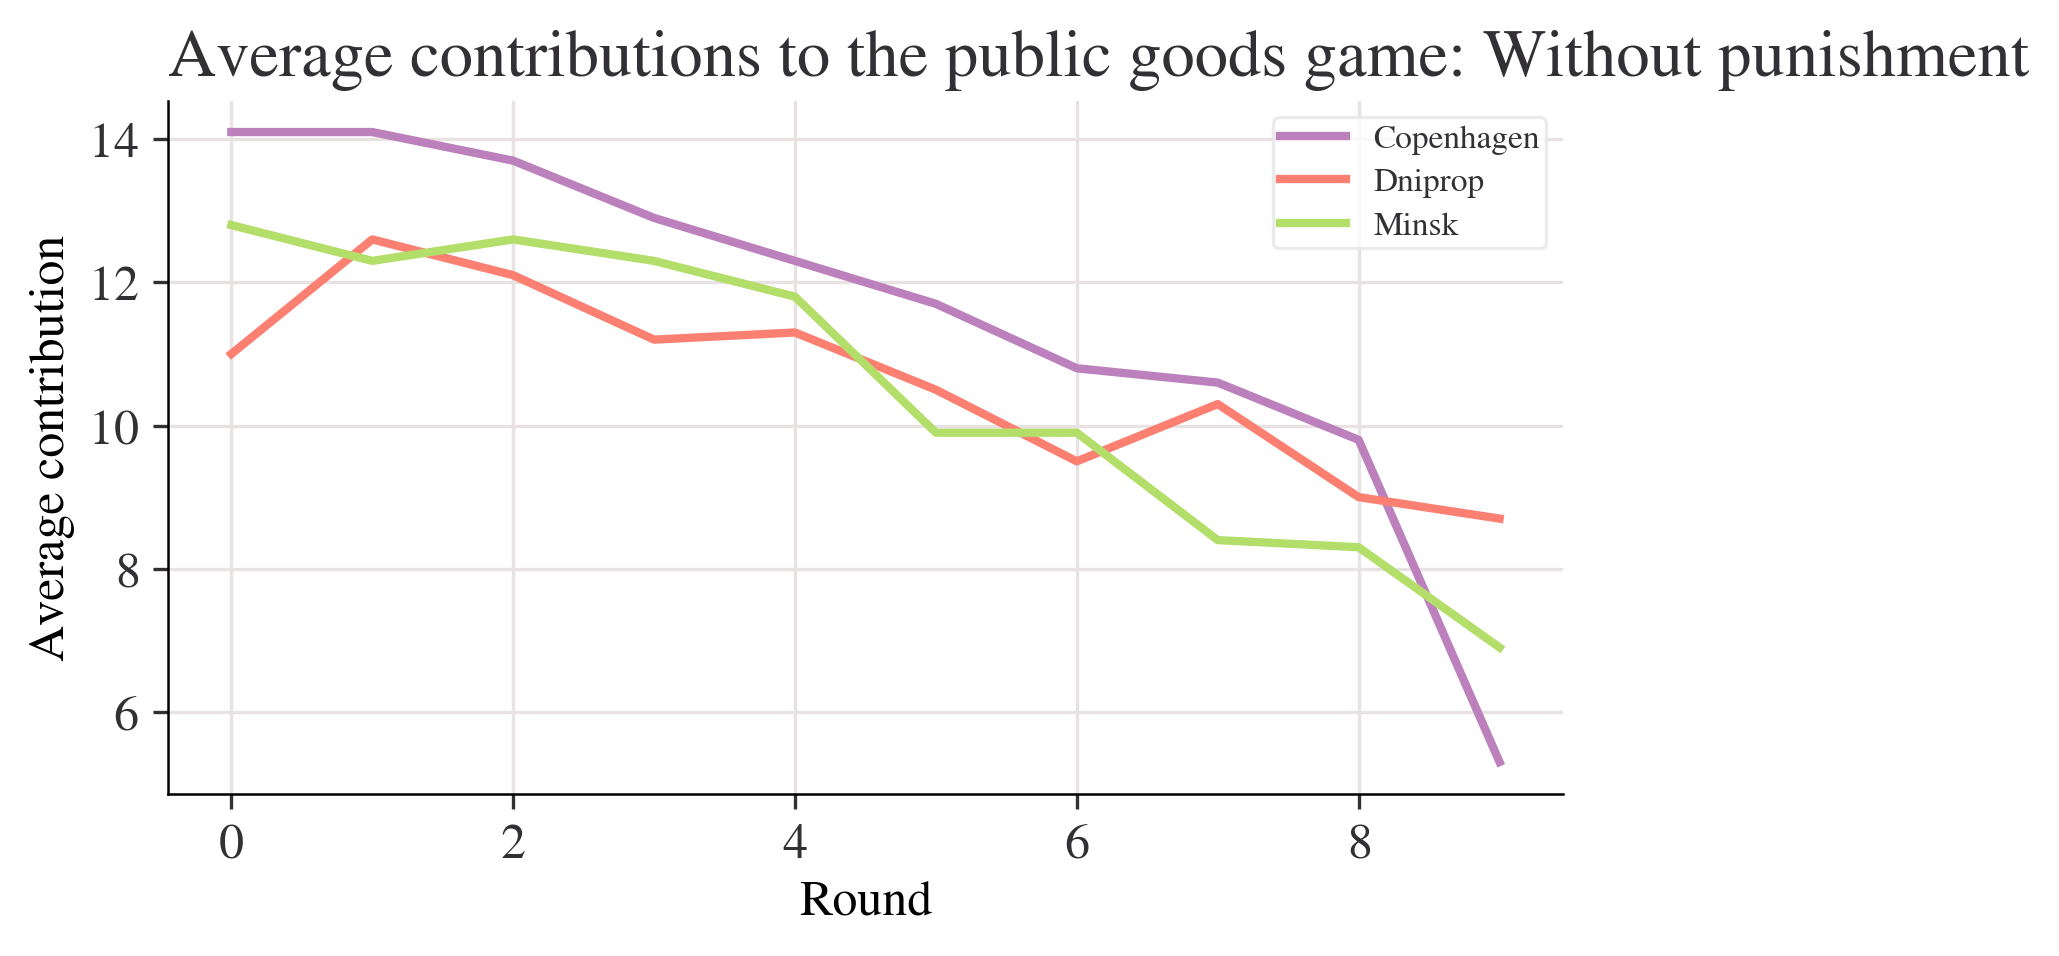

In [6]:
# Plot the data
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

## Part 2.1 Collecting data by playing a public goods game

### P2.1.1
 *Make a line chart with average contribution as the vertical axis variable, and period (from 1 to 10) on the horizontal axis. Describe how average contributions have changed over the course of the game.*

In [7]:
# URL raw del archivo en GitHub
url = 'https://raw.githubusercontent.com/isismrtz/Taller-4/main/Datos/Derivados/Juego.xlsx'

df = pd.read_excel(url)
df.head()

,Round,Team,Contributions,Pay-offs
0,1,1​,100,-26
1,1,10​,30,44
2,1,11​,50,24
3,1,12​,50,24
4,1,2​,70,4


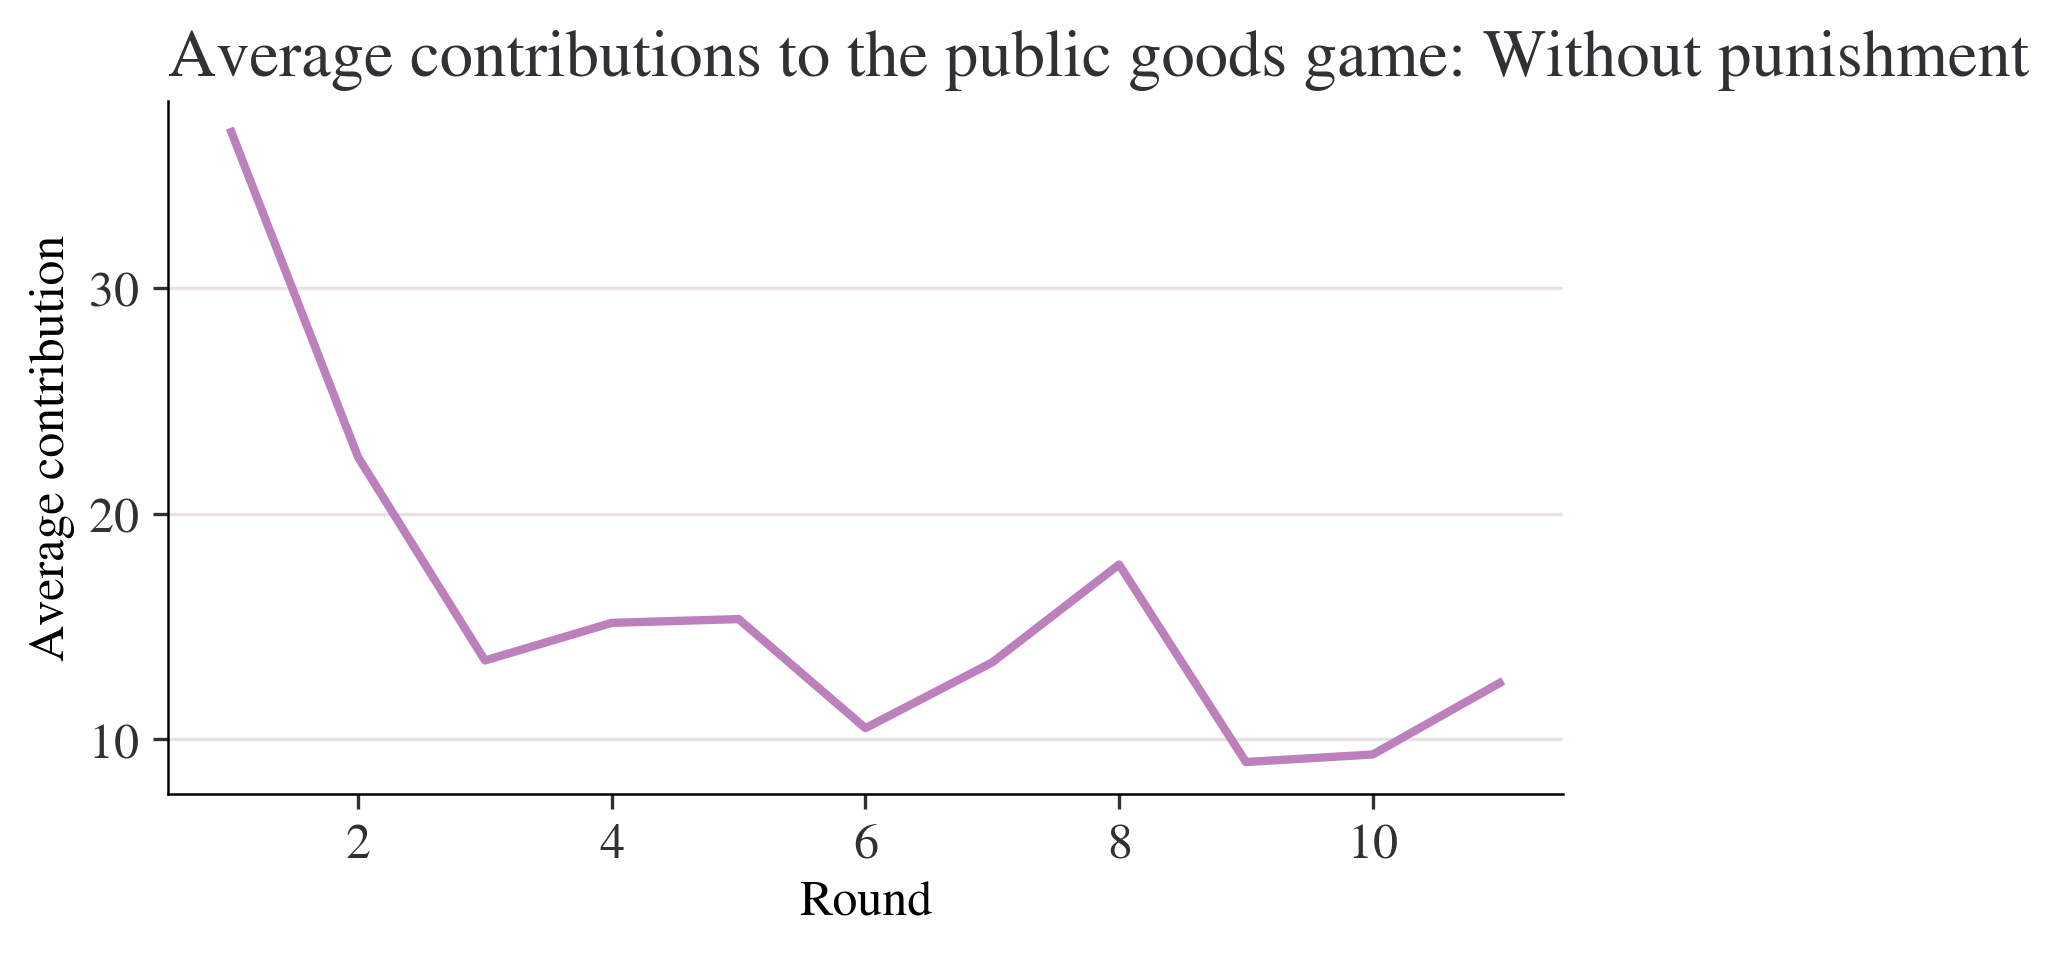

In [8]:
Rondas = list(range(1, 12))


mean_contributions = df.groupby('Round')['Contributions'].mean()

# Plot the data
plt.plot(Rondas, mean_contributions)
plt.title("Average contributions to the public goods game: Without punishment")
plt.ylabel("Average contribution")
plt.xlabel("Round")
plt.show()

**Inicialmente, las contribuciones son altas, pero experimentan un descenso pronunciado en las primeras rondas. Posteriormente, se observa una fluctuación en los valores, con algunos aumentos y descensos menores, aunque la tendencia general parece mantenerse en niveles bajos en comparación con el inicio.**

Use the data from your own experiment to answer Question 1. As an example, we will use the data for the first three cities of the dataset that will be introduced in Part 2.2.

Now we need to plot the data. Note that, with data in 'wide' format (one column per city) and with an index, simply calling `.plot` on a **pandas** dataframe will create a **matplotlib** line chart. We could also use the **lets-plot** package to make this kind of chart, but it expects data in 'tidy' or 'long' formatâ€”and for that, we would have to reshape the data so that the city names were values in a single column called 'city' or similar. Let's just use **matplotlib** for now.

### P2.1.2
*Compare your line chart with Figure 3 of Herrmann et al. (2008).1 Comment on any similarities or differences between the results (for example, the amount contributed at the start and end, or the change in average contributions over the course of the game).*

**Ambos gráficos muestran que las contribuciones comienzan altas y disminuyen con el tiempo. En Herrmann et al. (2008), la caída es más suave y termina cerca de cero, mientras que en el gráfico del juego hay más fluctuaciones y variabilidad.**

### P2.1.3
*Can you think of any reasons why your results are similar to (or different from) those in Figure 3? You may find it helpful to read the ‘Experiments’ section of the Herrmann et al. (2008) study for a more detailed description of how the experiments were conducted.*


**Las diferencias en los resultados pueden explicarse por varias razones:**  

1. **Incentivos más altos en nuestro experimento:** **En nuestro caso, el retorno de la cooperación era el doble de la contribución, mientras que en el experimento de Herrmann et al. (2008), el retorno era solo del 0.4 por cada unidad invertida. Esto incentivó una mayor cooperación inicial y fluctuaciones más marcadas en las contribuciones.**  

2. **Diferencias en la muestra:** **En el estudio de Herrmann et al., participaron 1,200 individuos desconocidos entre sí, mientras que en nuestro experimento los participantes eran estudiantes con algún grado de interacción previa. Esto pudo generar un mayor sentido de confianza o compromiso, afectando los patrones de cooperación.**  

3. **Interacción social previa:** **En nuestro experimento, los participantes tuvieron oportunidad de conversar antes y durante el juego, lo que pudo influir en sus decisiones de contribución. En contraste, el estudio de Herrmann et al. (2008) se llevó a cabo sin interacciones previas entre los participantes, reduciendo posibles efectos de comunicación o acuerdos informales.**  

**Estos factores pueden explicar por qué nuestro gráfico muestra mayor variabilidad y no converge a cero como en Herrmann et al. (2008).**


## Part 2.2 Describing the data

### P2.2.1 Using the data for Figures 2A and 3 of Herrmann et al. (2008):



*   Calculate the mean contribution in each period (row) separately for both experimentes
*   Plot a line chart of mean contribution on the vertical axis and time period (from 1 to 10) on the horizontal axis (with a separate line for each experiment). Make sure the lines in the legend are clearly labelled according to the experiment (with punishment or without punishment).
*   Describe any differences and similarities you see in the mean contribution over time in both experiments.

Both the tables you need are in a single Excel worksheet. Note down the cell ranges of each table, in this case A2:Q12 for the without punishment data and A16:Q26 for the punishment data. We will use this range information to import the data into two dataframes (`data_n` and `data_p` respectively).

How to use data? In Colab, check this: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

In [9]:
url_1= 'https://raw.githubusercontent.com/isismrtz/Taller-4/main/Datos/Originales/doing-economics-datafile-working-in-excel-project-2.xlsx'

In [10]:
data_np = pd.read_excel(
   url_1,
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


We can check the datatypes of the data we just read in using `data_n.info()` (you can do the same for `data_p`).

In [11]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


We have continuous real numbers in the columns of `data_n` and `data_p` here, so we'll set the datatypes to be `double`, which is a datatype used for continuous real numbers.


In [12]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Copenhagen       10 non-null     float64
 1   Dnipropetrovs’k  10 non-null     float64
 2   Minsk            10 non-null     float64
 3   St. Gallen       10 non-null     float64
 4   Muscat           10 non-null     float64
 5   Samara           10 non-null     float64
 6   Zurich           10 non-null     float64
 7   Boston           10 non-null     float64
 8   Bonn             10 non-null     float64
 9   Chengdu          10 non-null     float64
 10  Seoul            10 non-null     float64
 11  Riyadh           10 non-null     float64
 12  Nottingham       10 non-null     float64
 13  Athens           10 non-null     float64
 14  Istanbul         10 non-null     float64
 15  Melbourne        10 non-null     float64
dtypes: float64(16)
memory usage: 1.3+ KB


In [13]:
data_n

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,14.102941,10.954545,12.79410,13.687500,9.53846,10.84210,11.08330,12.96430,10.850000,10.0000,8.250000,7.958333,10.928571,8.136364,8.937500,8.225
2,14.132353,12.636363,12.33820,12.802067,10.98080,11.50000,12.16670,12.71430,10.800000,9.9625,9.142857,7.729167,10.535714,6.272727,9.015625,7.325
3,13.720588,12.068182,12.58820,12.354184,11.51920,11.72370,10.78130,12.71430,11.516667,10.2250,9.892857,7.187500,9.125000,6.409091,8.437500,6.250
4,12.897059,11.181818,12.26470,10.604183,10.30770,11.30920,10.63540,11.35710,10.700000,10.0125,9.666667,7.875000,8.982143,6.318182,6.921875,5.975
5,12.338235,11.272727,11.82350,10.989583,9.82692,10.33550,8.52083,11.03570,10.700000,9.1000,9.011905,7.895833,8.071428,6.727272,5.812500,5.425
6,11.676471,10.477273,9.88235,10.708317,10.28850,10.20390,7.10417,10.14290,9.416667,7.7000,8.559524,7.791667,5.410714,6.318182,4.546875,5.050
7,10.779412,9.454545,9.88235,10.145817,10.19230,8.71710,7.41667,9.05357,7.683333,6.6375,7.892857,8.145834,5.339286,5.863636,3.921875,4.275
8,10.632353,10.340909,8.42647,9.510415,10.11540,8.23684,7.31250,6.17857,8.566667,6.0125,7.130952,8.291667,4.660714,6.250000,3.156250,3.200
9,9.764706,9.022727,8.26471,7.374998,9.55769,8.17763,6.21875,4.16071,7.400000,4.5125,5.857143,7.541667,4.053571,5.909091,2.171875,2.300


In [14]:
data_p

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,15.411765,9.477273,11.750000,15.041667,9.211538,10.763158,13.228261,16.017857,12.050000,9.895833,9.690476,6.145833,11.321428,5.818182,6.546875,7.850
2,16.970589,9.909091,13.235294,16.718750,10.307693,11.302631,15.021739,17.821428,13.466666,11.062500,12.107142,6.770833,13.892858,5.636364,6.578125,10.475
3,17.735294,11.840909,12.897058,17.572916,10.057693,11.743421,15.771739,18.553572,14.083333,12.312500,13.273809,6.708333,14.696428,5.863636,6.718750,12.800
4,18.161764,11.454545,13.382353,17.427084,10.000000,11.763158,16.260870,18.875000,14.033334,13.375000,14.107142,7.937500,14.410714,6.250000,6.453125,13.575
5,18.367647,12.681818,13.970589,17.645834,9.576923,11.190789,16.358696,18.232143,15.416667,14.354167,14.392858,7.604167,15.267858,6.227273,6.968750,15.050
6,18.691177,11.750000,13.014706,17.343750,9.903846,12.184211,16.619566,18.553572,14.416667,15.427083,15.285714,7.604167,16.446428,5.863636,7.156250,15.775
7,18.735294,11.227273,13.176471,16.791666,10.269231,12.151316,17.195652,18.678572,15.216666,15.687500,16.047619,6.250000,16.375000,5.636364,7.531250,16.225
8,18.323530,10.681818,13.691176,16.750000,10.846154,12.184211,17.032608,18.053572,15.500000,15.979167,16.809525,6.375000,16.732143,4.840909,7.843750,16.525
9,18.073530,9.704545,12.411765,16.885416,9.711538,12.388158,17.565218,18.178572,16.000000,15.854167,17.285715,7.125000,16.303572,4.681818,7.843750,17.100


We calculate the mean using two different methods, to illustrate that there are usually many ways of achieving the same thing. We apply the first method on `data_n`, which uses the built-in `.mean()` function to calculate the average separately over each column except the first. We use the second method (the `agg` function) on `data_p`.

As the name suggests, the `agg` function applies an aggregation function (the mean function in this case) to all rows or columns in a dataframe. The second input, `axis=1`, applies the specified function to all rows in `data_p`, so we are taking the average over cities for each period.

In [15]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)
mean_p_c

<ipython-input-15-4d2577de781f>:2: FutureWarning: The provided callable <function mean at 0x7b80b6d2eb60> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)


,0
Period,
1,10.638759
2,11.954794
3,12.664337
4,12.966662
5,13.331636
6,13.502236
7,13.574680
8,13.635535
9,13.569548


Typing `axis=0` would have calculated column means instead, i.e. it would have averaged over periods to produce one value per city (run this code to see for yourself). Type `help(pd.DataFrame.agg)` in your interactive Python window for more details, or see Python walk-through 2.5 for further practice.


####Plot the mean contribution####


Now we will produce a line chart showing the mean contributions.

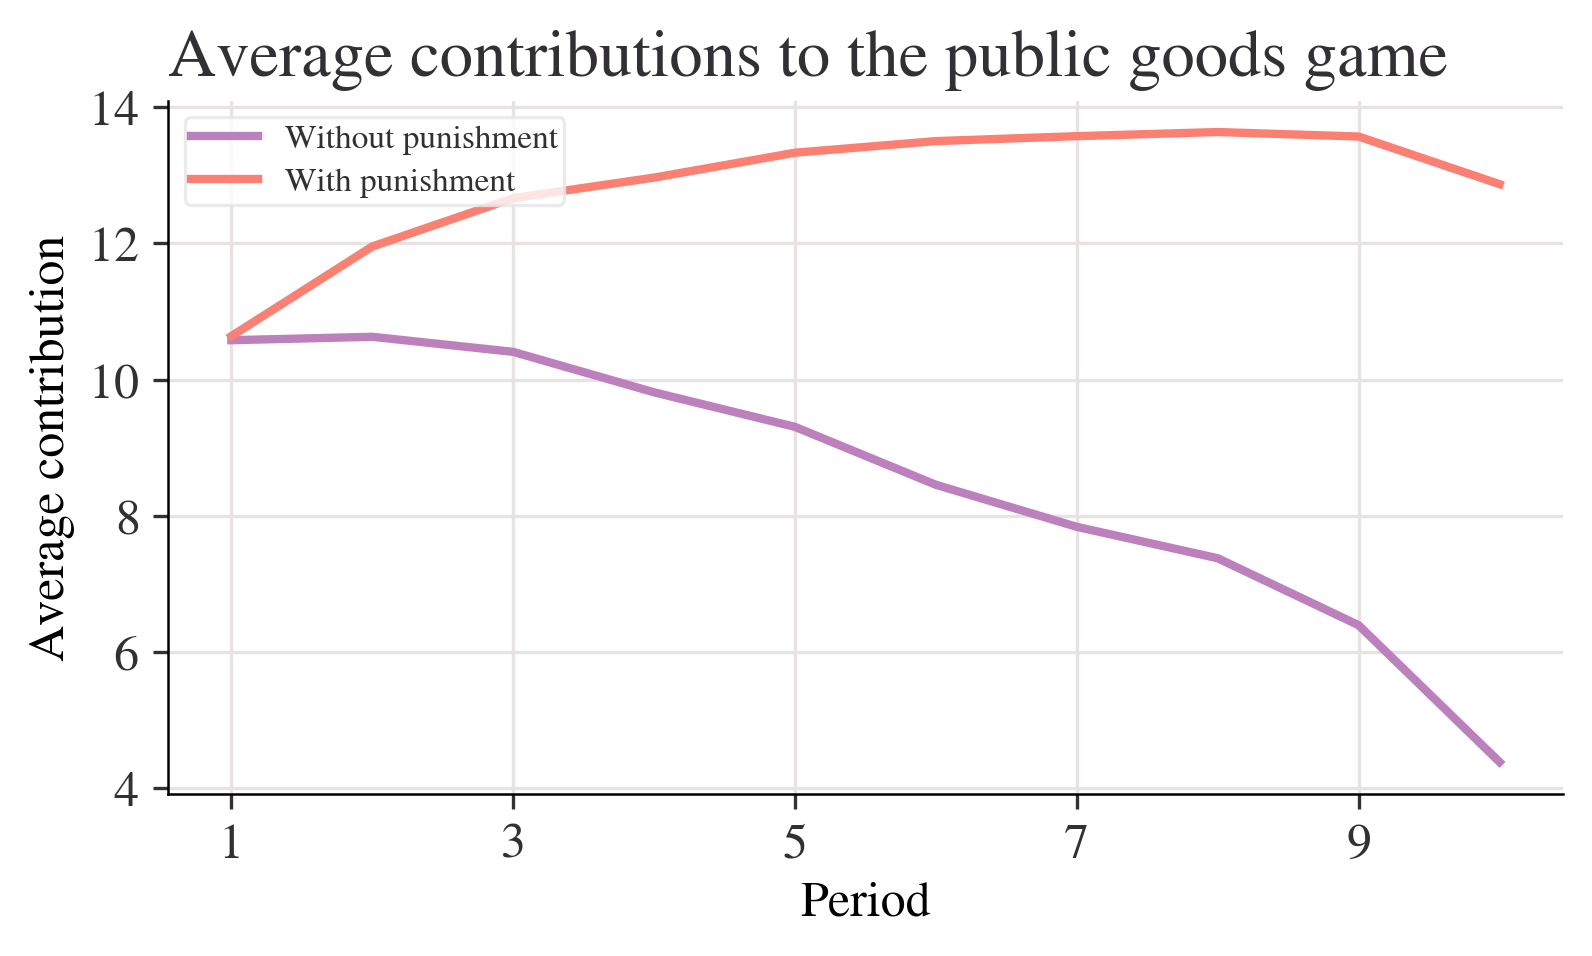

In [16]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

**Los resultados muestran diferencias claras entre las condiciones con y sin castigo. En la condición sin castigo (*Without punishment*), las contribuciones comienzan en un nivel moderado pero disminuyen progresivamente, lo que sugiere que los participantes optan por estrategias egoístas (*free-riding*) a medida que avanza el juego. Sin una consecuencia por no cooperar, la confianza se erosiona y la cooperación colapsa. En cambio, en la condición con castigo (*With punishment*), las contribuciones no solo aumentan con el tiempo, sino que se estabilizan en niveles altos. Esto indica que la amenaza de sanciones induce a los jugadores a contribuir más para evitar penalizaciones, fomentando un comportamiento cooperativo sostenido. La presencia de castigo genera un incentivo para mantener la cooperación y evita la caída progresiva de las contribuciones observada en la condición sin castigo. Estos hallazgos respaldan la idea de que los mecanismos de castigo son efectivos para reforzar la cooperación en situaciones de bienes públicos, ya que reducen el comportamiento oportunista y estabilizan la contribución grupal.**


### P2.2.2

Instead of looking at all periods, we can focus on contributions in the first and last period. Plot a column chart showing the mean contribution in the first and last period for both experiments.










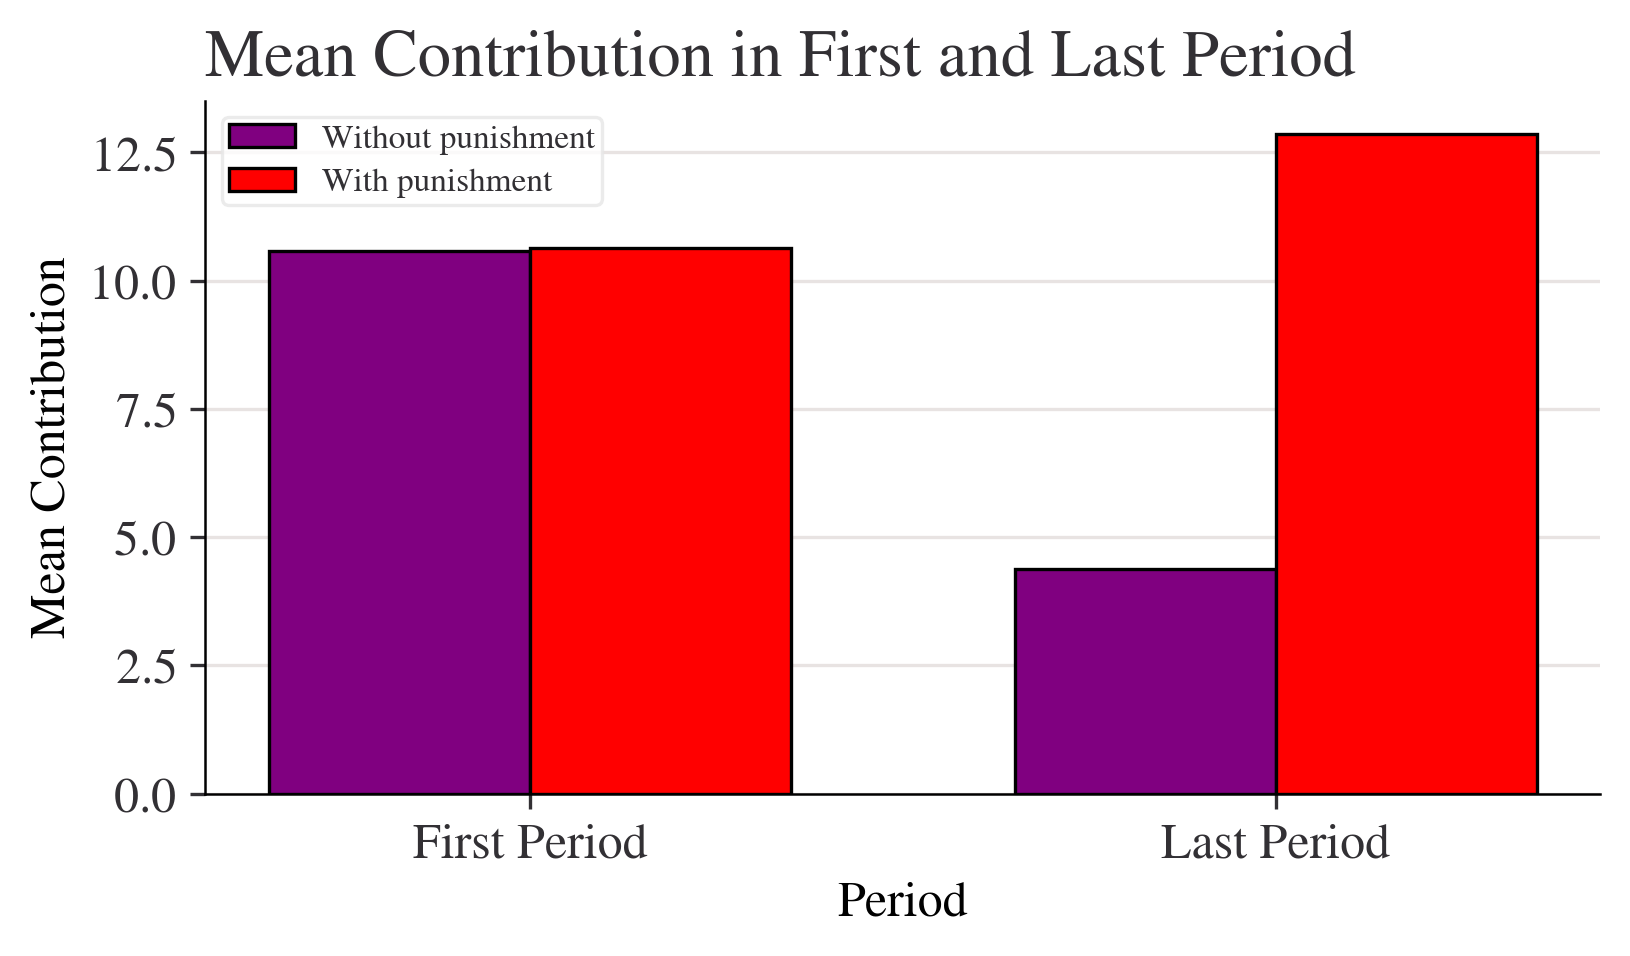

In [17]:
# Extraer los valores de la contribución promedio en el primer y último período
first_period_n = mean_n_c.iloc[0]  # Primer período sin castigo
last_period_n = mean_n_c.iloc[-1]  # Último período sin castigo

first_period_p = mean_p_c.iloc[0]  # Primer período con castigo
last_period_p = mean_p_c.iloc[-1]  # Último período con castigo

# Datos para el gráfico
labels = ["First Period", "Last Period"]
no_punishment = [first_period_n, last_period_n]
punishment = [first_period_p, last_period_p]

x = np.arange(len(labels))  # Posiciones en el eje x
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, no_punishment, width, label="Without punishment", color="purple")
bars2 = ax.bar(x + width/2, punishment, width, label="With punishment", color="red")

# Etiquetas y título
ax.set_xlabel("Period")
ax.set_ylabel("Mean Contribution")
ax.set_title("Mean Contribution in First and Last Period")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

**El gráfico muestra que en el primer período las contribuciones promedio son similares en ambos experimentos, lo que indica un nivel inicial de cooperación sin diferencias significativas. Sin embargo, en el último período, las contribuciones en la condición sin castigo (*Without punishment*) disminuyen drásticamente, reflejando la erosión de la cooperación debido a la ausencia de consecuencias por el *free-riding*. En contraste, en la condición con castigo (*With punishment*), las contribuciones se mantienen altas e incluso aumentan, lo que indica que la amenaza de sanciones fomenta un comportamiento cooperativo sostenido. Esto demuestra que el castigo es un mecanismo efectivo para evitar la caída de la cooperación y estabilizar la contribución grupal en juegos de bienes públicos.**


### P2.2.3
Using the data for Figures 2A and 3 of Herrmann et al. (2008)

*   Calculate the standard deviation for Periods 1 and 10 separately, for both experiments. Does the rule of thumb apply? (In other words, are most values within two standard deviations of the mean?)
*   As shown in Figure 2.3, the mean contribution for both experiments was 10.6 in Period 1. With reference to your standard deviation calculations, explain whether this means that the two sets of data are the same.


In [18]:
# Extraer los valores de contribución para el Periodo 1 y Periodo 10
contributions_n_p1 = data_n.iloc[0, :].values.astype(float)  # Period 1, Without Punishment
contributions_n_p10 = data_n.iloc[-1, :].values.astype(float)  # Period 10, Without Punishment

contributions_p_p1 = data_p.iloc[0, :].values.astype(float)  # Period 1, With Punishment
contributions_p_p10 = data_p.iloc[-1, :].values.astype(float)  # Period 10, With Punishment

# Calcular la desviación estándar para cada conjunto de datos
std_n_p1 = np.std(contributions_n_p1, ddof=1)  # Desviación estándar en Periodo 1 (Without Punishment)
std_n_p10 = np.std(contributions_n_p10, ddof=1)  # Desviación estándar en Periodo 10 (Without Punishment)

std_p_p1 = np.std(contributions_p_p1, ddof=1)  # Desviación estándar en Periodo 1 (With Punishment)
std_p_p10 = np.std(contributions_p_p10, ddof=1)  # Desviación estándar en Periodo 10 (With Punishment)

# Mostrar resultados
print(f"Standard Deviation - Without Punishment (Period 1): {std_n_p1:.2f}")
print(f"Standard Deviation - Without Punishment (Period 10): {std_n_p10:.2f}")
print(f"Standard Deviation - With Punishment (Period 1): {std_p_p1:.2f}")
print(f"Standard Deviation - With Punishment (Period 10): {std_p_p10:.2f}")

# Verificación de la regla de las dos desviaciones estándar
mean_period_1 = 10.6  # Media dada para Periodo 1 en ambos experimentos
within_2_std_n_p1 = np.sum((contributions_n_p1 >= mean_period_1 - 2*std_n_p1) & (contributions_n_p1 <= mean_period_1 + 2*std_n_p1)) / len(contributions_n_p1)
within_2_std_p_p1 = np.sum((contributions_p_p1 >= mean_period_1 - 2*std_p_p1) & (contributions_p_p1 <= mean_period_1 + 2*std_p_p1)) / len(contributions_p_p1)

print(f"Percentage of values within 2 std devs (Without Punishment, Period 1): {within_2_std_n_p1:.2%}")
print(f"Percentage of values within 2 std devs (With Punishment, Period 1): {within_2_std_p_p1:.2%}")

Standard Deviation - Without Punishment (Period 1): 2.02
Standard Deviation - Without Punishment (Period 10): 2.19
Standard Deviation - With Punishment (Period 1): 3.21
Standard Deviation - With Punishment (Period 10): 3.90
Percentage of values within 2 std devs (Without Punishment, Period 1): 100.00%
Percentage of values within 2 std devs (With Punishment, Period 1): 100.00%


**Aunque la contribución promedio en el Periodo 1 fue de 10.6 en ambos experimentos, esto no significa necesariamente que los dos conjuntos de datos sean iguales. La desviación estándar en la condición "Sin castigo" es de 2.02, mientras que en la condición "Con castigo" es de 3.21, lo que indica que las contribuciones en la condición con castigo presentan mayor variabilidad. Aunque las medias sean idénticas, la desviación estándar más alta en la condición con castigo sugiere que las contribuciones individuales estuvieron más dispersas alrededor de la media, es decir, los participantes tuvieron comportamientos más diversos. Además, la regla general se cumple, ya que el 100% de los valores están dentro de dos desviaciones estándar de la media en ambos casos. Sin embargo, las diferencias en la dispersión indican que la distribución de las contribuciones no es idéntica entre los dos experimentos.**



### P2.2.4
Calculate the maximum and minimum value for Periods 1 and 10 separately, for both experiments.




In [19]:
# Without Punishment
max_n_p1 = np.max(contributions_n_p1)
min_n_p1 = np.min(contributions_n_p1)

max_n_p10 = np.max(contributions_n_p10)
min_n_p10 = np.min(contributions_n_p10)

# With Punishment
max_p_p1 = np.max(contributions_p_p1)
min_p_p1 = np.min(contributions_p_p1)

max_p_p10 = np.max(contributions_p_p10)
min_p_p10 = np.min(contributions_p_p10)

# Mostrar los resultados
print(f"Max - Without Punishment (Period 1): {max_n_p1}")
print(f"Min - Without Punishment (Period 1): {min_n_p1}")
print(f"Max - Without Punishment (Period 10): {max_n_p10}")
print(f"Min - Without Punishment (Period 10): {min_n_p10}")

print(f"Max - With Punishment (Period 1): {max_p_p1}")
print(f"Min - With Punishment (Period 1): {min_p_p1}")
print(f"Max - With Punishment (Period 10): {max_p_p10}")
print(f"Min - With Punishment (Period 10): {min_p_p10}")

Max - Without Punishment (Period 1): 14.102941176470589
Min - Without Punishment (Period 1): 7.958333416666666
Max - Without Punishment (Period 10): 8.681818181818182
Min - Without Punishment (Period 10): 1.3
Max - With Punishment (Period 1): 16.01785659790039
Min - With Punishment (Period 1): 5.818181991577148
Max - With Punishment (Period 10): 17.511905670166016
Min - With Punishment (Period 10): 6.204545497894287


### P2.2.5
A concise way to describe the data is in a summary table. With just four numbers (mean, standard deviation, minimum value, maximum value), we can get a general idea of what the data looks like.



*   Create a table of summary statistics that displays mean, variance, standard deviation, minimum, maximum and range for Periods 1 and 10 and for both experiments.
*   Comment on any similarities and differences in the distributions, both across time and across experiments.

In [20]:
# Calcular estadísticas
mean_n_p1 = np.mean(contributions_n_p1)
mean_n_p10 = np.mean(contributions_n_p10)
mean_p_p1 = np.mean(contributions_p_p1)
mean_p_p10 = np.mean(contributions_p_p10)

var_n_p1 = np.var(contributions_n_p1, ddof=1)
var_n_p10 = np.var(contributions_n_p10, ddof=1)
var_p_p1 = np.var(contributions_p_p1, ddof=1)
var_p_p10 = np.var(contributions_p_p10, ddof=1)

std_n_p1 = np.std(contributions_n_p1, ddof=1)
std_n_p10 = np.std(contributions_n_p10, ddof=1)
std_p_p1 = np.std(contributions_p_p1, ddof=1)
std_p_p10 = np.std(contributions_p_p10, ddof=1)

max_n_p1 = np.max(contributions_n_p1)
min_n_p1 = np.min(contributions_n_p1)
max_n_p10 = np.max(contributions_n_p10)
min_n_p10 = np.min(contributions_n_p10)

max_p_p1 = np.max(contributions_p_p1)
min_p_p1 = np.min(contributions_p_p1)
max_p_p10 = np.max(contributions_p_p10)
min_p_p10 = np.min(contributions_p_p10)

range_n_p1 = max_n_p1 - min_n_p1
range_n_p10 = max_n_p10 - min_n_p10
range_p_p1 = max_p_p1 - min_p_p1
range_p_p10 = max_p_p10 - min_p_p10

# Crear la tabla de resumen
summary_table = pd.DataFrame({
    "Experiment": ["Without Punishment", "Without Punishment", "With Punishment", "With Punishment"],
    "Period": [1, 10, 1, 10],
    "Mean": [mean_n_p1, mean_n_p10, mean_p_p1, mean_p_p10],
    "Variance": [var_n_p1, var_n_p10, var_p_p1, var_p_p10],
    "Standard Deviation": [std_n_p1, std_n_p10, std_p_p1, std_p_p10],
    "Minimum": [min_n_p1, min_n_p10, min_p_p1, min_p_p10],
    "Maximum": [max_n_p1, max_n_p10, max_p_p1, max_p_p10],
    "Range": [range_n_p1, range_n_p10, range_p_p1, range_p_p10]
})

# Mostrar la tabla en Google Colab
from IPython.display import display
display(summary_table)  # Usar display() para visualizar la tabla en Colab

,Experiment,Period,Mean,Variance,Standard Deviation,Minimum,Maximum,Range
0,Without Punishment,1,10.578313,4.083325,2.020724,7.958333,14.102941,6.144608
1,Without Punishment,10,4.383769,4.783520,2.187126,1.300000,8.681818,7.381818
2,With Punishment,1,10.638759,10.286506,3.207258,5.818182,16.017857,10.199675
3,With Punishment,10,12.869879,15.194557,3.898020,6.204545,17.511906,11.307360




**Las distribuciones presentan diferencias significativas tanto a lo largo del tiempo como entre los experimentos *con castigo* y *sin castigo*.**  

- **Diferencias a lo largo del tiempo:** En la condición *sin castigo*, la contribución promedio disminuye con el tiempo, lo que indica una distrción en la cooperación debido a la ausencia de consecuencias para los *free-riders*. En cambio, en la condición *con castigo*, la contribución se mantiene estable o incluso aumenta en los últimos periodos, lo que sugiere que el castigo incentiva un comportamiento cooperativo sostenido.  

- **Diferencias entre experimentos:** La desviación estándar y el rango son mayores en la condición *con castigo*, lo que indica que los participantes muestran una mayor variabilidad en sus decisiones. En contraste, en la condición *sin castigo*, la cooperación colapsa progresivamente y los valores se agrupan en niveles más bajos.  

- **Similitudes:** Ambos experimentos comienzan con niveles de contribución similares en el **Periodo 1**, con una media de 10.6. Además, en ambos casos, la mayoría de los valores se encuentran dentro de dos desviaciones estándar de la media, lo que sugiere que siguen distribuciones relativamente normales dentro de sus respectivas dinámicas.  

En conclusión, el castigo es un factor clave que afecta la distribución de las contribuciones: **sin castigo, la cooperación se reduce con el tiempo, mientras que con castigo, se mantiene estable o aumenta, aunque con mayor variabilidad en las decisiones individuales.**  


## Part 2.3 How did changing the rules of the game affect behaviour?

### P2.3.1
You can conduct another experiment to understand why we might see differences in behaviour that are due to chance.

First, flip a coin six times, using one hand only, and record the results (for example, Heads, Heads, Tails, etc.). Then, using the same hand, flip a coin six times and record the results again.

Compare the outcomes from Question 1(a). Did you get the same number of heads in both cases? Even if you did, was the sequence of the outcomes (for example, Heads, Tails, Tails …) the same in both cases?


(...)

In [21]:
  # Crear la tabla
coin_flips = pd.DataFrame({
    "Throw 1": ["T", "H", "T", "T", "H", "T"],
    "Throw 2": ["H", "H", "T", "H", "T", "H"]
})

# Mostrar la tabla
display(coin_flips)

# Contar número de "H" en cada serie
heads_throw_1 = coin_flips["Throw 1"].value_counts().get("H", 0)
heads_throw_2 = coin_flips["Throw 2"].value_counts().get("H", 0)

# Mostrar los resultados de manera clara
print(f"Número de Heads en Throw 1: {heads_throw_1}")
print(f"Número de Heads en Throw 2: {heads_throw_2}")

,Throw 1,Throw 2
0,T,H
1,H,H
2,T,T
3,T,H
4,H,T
5,T,H


Número de Heads en Throw 1: 2
Número de Heads en Throw 2: 4
